In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

gradient method for $f : \mathbb{R} \to \mathbb{R}$ and $f : \mathbb{R}^n \to \mathbb{R}$

In [2]:
def armijo(f, df,  x_0, epsilon, sigma, beta):
    x = [x_0]
    
    while np.linalg.norm(df(x[-1])) > epsilon:
        d = -df(x[-1])
        t = 1
        f_k = f(x[-1])
        s_k = -sigma*d*d

        while f(x[-1] + t*d) > f_k + t*s_k:
            t *= beta
                    
        x.append(x[-1] + t*d)
        
    return x

In [3]:
def armijo_multi(f, df,  x_0, epsilon, sigma, beta):
    x = [x_0]
    
    while np.linalg.norm(df(*x[-1])) > epsilon:
        d = -df(*x[-1])
        t = 1
        f_k = f(*x[-1])
        s_k = max(-sigma*np.transpose(d)*d)

        while f(*(x[-1] + t*d)) > f_k + t*s_k:
            t *= beta
                    
        x.append(x[-1] + t*d)
        
    return x

Function for plotting:

In [4]:
# Symbolic variables and plotting multivariate functions
x, y = symbols('x y')

def plot(i, param, plot_range, x_k, x_star=[]):
    
    # f
    f = param['f']
    X, Y = np.meshgrid(
        np.linspace(*plot_range[i][0], 200),
        np.linspace(*plot_range[i][1], 200))
    Z = f(X,Y)
    Z_contour = f(X,Y)
    
    # x_k
    x_k = np.array(x_k)
    X_k = x_k[:,0]
    Y_k = x_k[:,1]
    Z_k = np.array([f(*pt) for pt in x_k])

    # x_0
    x_zero = param['x_0']
    
    # 3D plot
    fig = plt.figure(figsize=(16, 8), dpi = 60)
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z, alpha=0.65, cmap='viridis')
    ax.view_init(64, 60)
    ax.plot(X_k, Y_k, Z_k, '.-k', label='x_k sequence')
    ax.scatter([x_zero[0]], [x_zero[1]], [f(*x_zero)], color='r', label='x_0')
    if len(x_star):
        ax.scatter([x_star[0]], [x_star[1]], [f(*x_star)], color='g', label='x*')

    # Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z_contour,25)
    ax.plot(X_k, Y_k, '.-k', label='x_k sequence')
    ax.scatter([x_zero[0]], [x_zero[1]], color='r', label='x_0')
    if len(x_star):
        ax.scatter([x_star[0]], [x_star[1]], color='g', label='x*')
    ax.invert_yaxis()
    ax.invert_xaxis()
    ax.legend()
    
    plt.show()

#### 25 a)

In [5]:
f = cos(x)
df = f.diff(x).doit()

a = {
    'f'  :  lambdify(x, f),
    'df' :  lambdify(x, df),
    'x_0' : 0.5,
    'epsilon' : 10**(-3),
    'sigma' : 10**(-2),
    'beta'  : 0.5
}

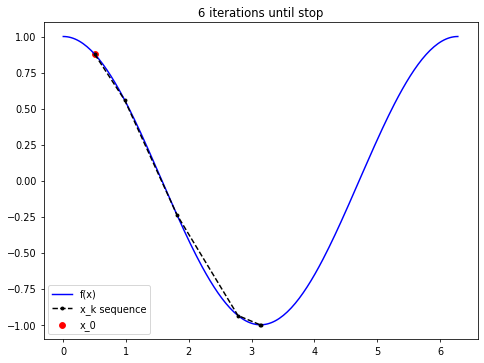

In [6]:
x_k = armijo(**a)

f = a['f']
x_zero = a['x_0']
plot_range = np.linspace(0,2*np.pi, 200)

plt.plot(plot_range, f(plot_range), 'b', label='f(x)')

plt.plot(x_k, f(x_k), 'k.--', label='x_k sequence')

plt.scatter([x_zero], [f(x_zero)], color='r', label='x_0')

plt.legend()
plt.title(f"{len(x_k)} iterations until stop")
plt.gcf().set_dpi(70)
plt.gcf().set_size_inches(8, 6)
plt.show()

#### 25 b)

In [7]:
f = (x*x + y - 11)**2 + (x + y*y - 7)**2

df = [  lambdify((x,y), f.diff(x).doit()), 
        lambdify((x,y), f.diff(y).doit())]

x_0 = [(-0.27, -0.91),
       (-0.25, -1.1),
       (-0.25, -1)]

params = [
    {
        'f'  :  lambdify((x,y), f),
        'df' :  lambda x_1, x_2: np.array([df[0](x_1,x_2), df[1](x_1,x_2)]),
        'x_0' : pt,
        'epsilon' : 10**(-1),
        'sigma' : 10**(-2),
        'beta'  : 0.5
    } for pt in x_0]
   
    
plot_range = [
              [[-1.5, 4],
               [-2, 3.5]],
              [[-4, 2.5],
               [-3, 4]],
              [[-0.75, 4.25],
               [-3.5, 1.5]]
             ]


x_0: (-0.27, -0.91), 7 iterations until stop


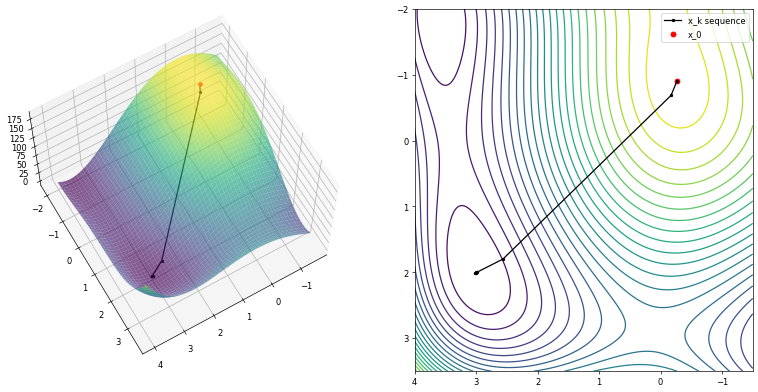

x_0: (-0.25, -1.1), 11 iterations until stop


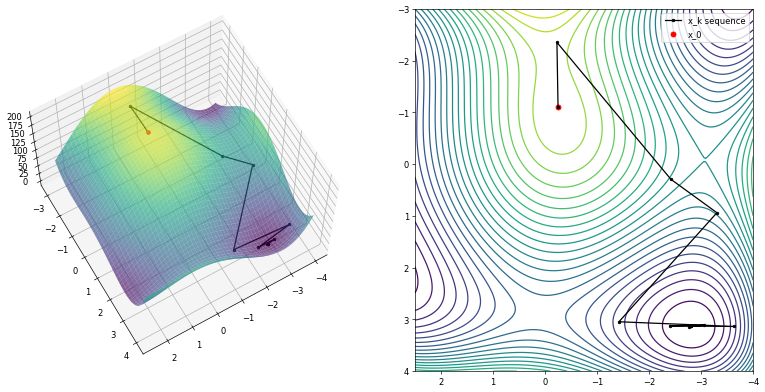

x_0: (-0.25, -1), 18 iterations until stop


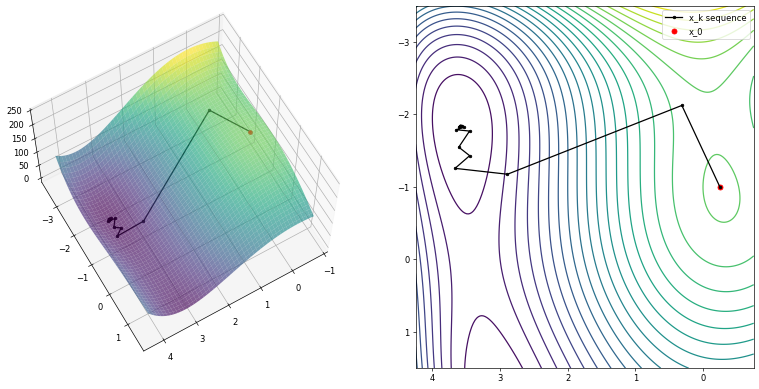

In [8]:
for i, param in enumerate(params):

    x_k = armijo_multi(**param)
    
    
    # Printing results:
    print(f"x_0: {param['x_0']}, {len(x_k)} iterations until stop")
    
    # Plotting results
    
    plot(i,param, plot_range, x_k)
    
    
    
    
    

#### 25 c)

In [9]:
g = 6*x*x - 6*x*y + 2*y*y + x + y + 1

dg = [  lambdify((x,y), g.diff(x).doit()), 
        lambdify((x,y), g.diff(y).doit())]

params = [{
        'f'  :  lambdify((x,y), g),
        'df' :  lambda x_1, x_2: np.array([dg[0](x_1,x_2), dg[1](x_1,x_2)]),
        'x_0' : (1,2),
        'epsilon' : 10**(-2),
        'sigma' : 10**(-2),
        'beta'  : 0.5
    }]
    
plot_range = [
              [[-1.75, 2.25],
               [-1.75, 2.25]],
            ]

x_0: (1, 2), 66 iterations until stop


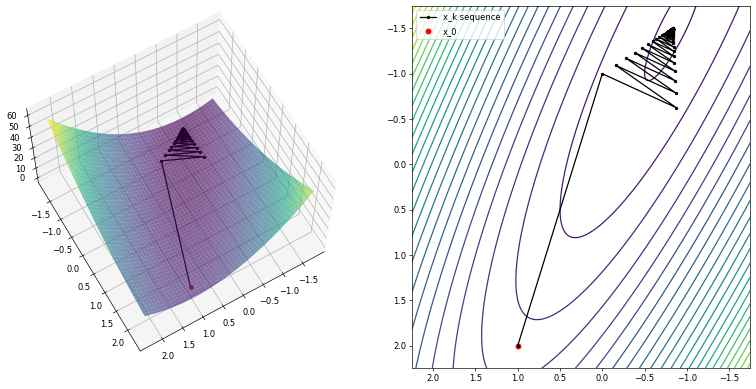

In [10]:
for i, param in enumerate(params):

    x_k = armijo_multi(**param)
    
    
    # Printing results:
    print(f"x_0: {param['x_0']}, {len(x_k)} iterations until stop")
    
    # Plotting results
    
    plot(i,param, plot_range, x_k)

#### 26)

In [11]:
h = (1 - x)**2 + 100*(y - x*x)**2

h = h.simplify()
dh = [  lambdify((x,y), h.diff(x).doit()), 
        lambdify((x,y), h.diff(y).doit())]

x_star = np.array([1,1])

params = [{
        'f'  :  lambdify((x,y), h),
        'df' :  lambda x_1, x_2: np.array([dh[0](x_1,x_2), dh[1](x_1,x_2)]),
        'x_0' : (-1.2,1),
        'epsilon' : epsilon,
        'sigma' : 10**(-4),
        'beta'  : 0.5
    } for epsilon in [10**(-k) for k in range(1,6)]]

plot_range = [
              [[-1.25, 1.15],
               [0.82, 1.13]]
             ]*len(params)

x_0: (-1.2, 1) 

epsilon:        0.1 
x_k:            [0.93102745 0.86636525] 
iteration:      55 
f(x_k):         0.0047771815497498525
norm(x_k - x*): 0.15038437631718918


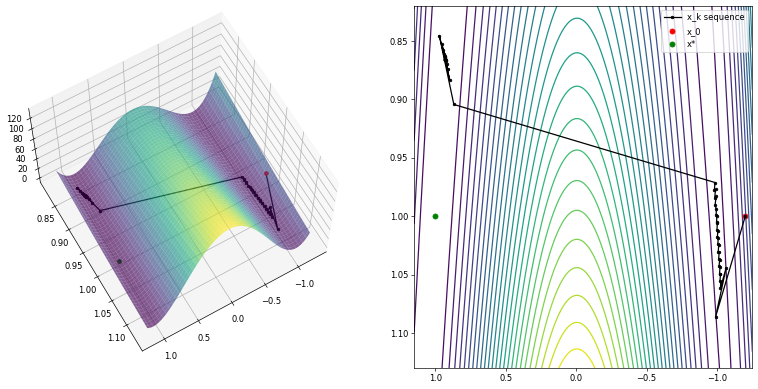

epsilon:        0.01 
x_k:            [0.99212983 0.98430584] 
iteration:      2436 
f(x_k):         6.196441487363887e-05
norm(x_k - x*): 0.017556943155253975


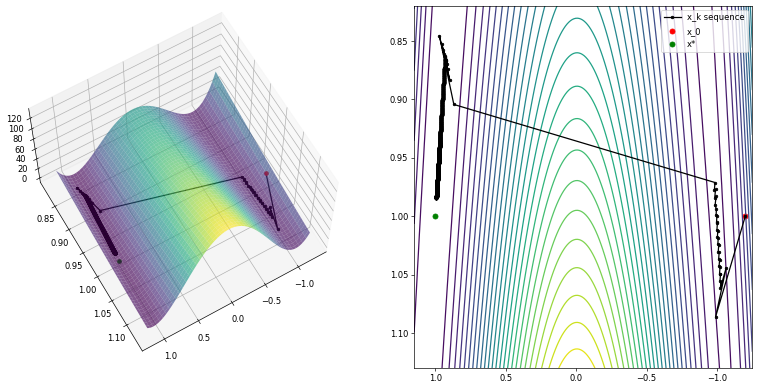

epsilon:        0.001 
x_k:            [0.99920972 0.99841847] 
iteration:      5232 
f(x_k):         6.247994415637484e-07
norm(x_k - x*): 0.0017679860568316915


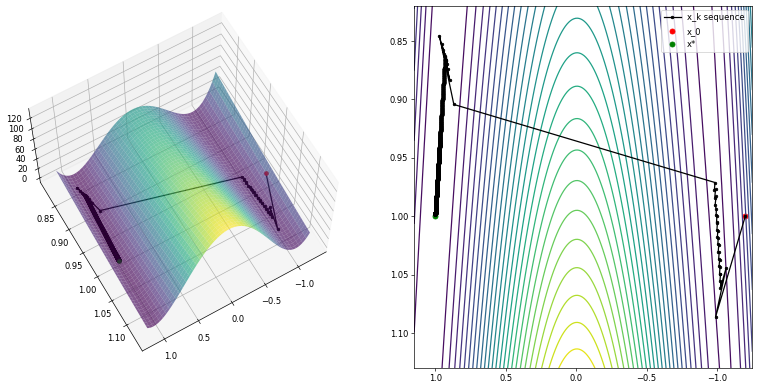

epsilon:        0.0001 
x_k:            [0.99992058 0.9998407 ] 
iteration:      8059 
f(x_k):         6.3296843505169926e-09
norm(x_k - x*): 0.0001780023220759267


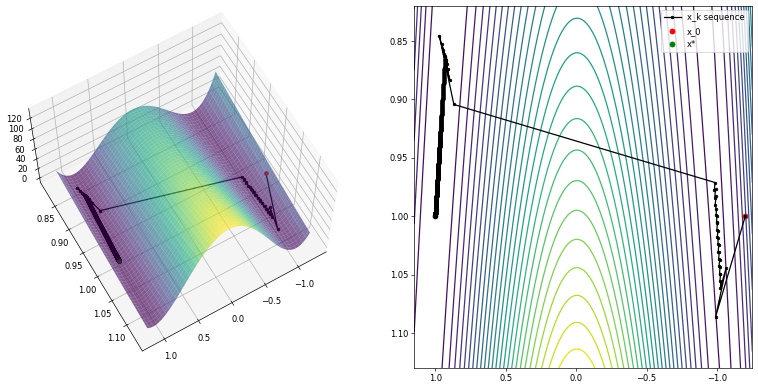

epsilon:        1e-05 
x_k:            [0.99999218 0.99998432] 
iteration:      10917 
f(x_k):         6.131903315956525e-11
norm(x_k - x*): 1.7520176463065997e-05


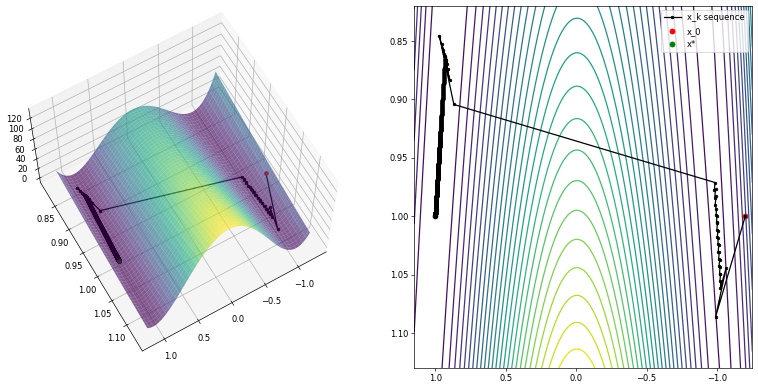

In [12]:
print('x_0:', (-1.2,1), '\n')


for i, param in enumerate(params):

    x_k = armijo_multi(**param)
    
    print(
          'epsilon:       ', param['epsilon'],
        '\nx_k:           ', x_k[-1], 
        '\niteration:     ' , len(x_k), 
        '\nf(x_k):        ', param['f'](*x_k[-1]))
    print('norm(x_k - x*):', np.linalg.norm(x_k[-1] - x_star))
    
    plot(i, param, plot_range, x_k, x_star=x_star)